In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
from matplotlib import font_manager,rc
f_name=font_manager.FontProperties(fname='C:/Windows/Fonts/NGULIM.ttf').get_name()
rc('font',family=f_name)

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%pwd

'C:\\Users\\lg_gram\\Intel\\bigcontest'

In [5]:
foreign=pd.read_csv("eco jeju/02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.CSV",encoding='CP949')

In [6]:
#알수없음 데이터 없음
foreign

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3170
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1308
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.6771
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5.5962
4,2018-01-01,1,USA,제주시,50110250,한림읍,3.9078
...,...,...,...,...,...,...,...
6059039,2021-06-30,24,USA,서귀포시,50130610,중문동,9.2120
6059040,2021-06-30,24,CHN,서귀포시,50130610,중문동,0.6039
6059041,2021-06-30,24,ETC,서귀포시,50130610,중문동,11.5473
6059042,2021-06-30,24,CHN,서귀포시,50130620,예래동,0.2013


In [13]:
foreign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6059044 entries, 0 to 6059043
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   base_date      object 
 1   time           int64  
 2   nationality    object 
 3   city           object 
 4   emd_cd         int64  
 5   emd_nm         object 
 6   visit_pop_cnt  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 323.6+ MB


In [16]:
foreign['visit_pop_cnt']=foreign['visit_pop_cnt'].astype('int')
foreign.head()

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5
4,2018-01-01,1,USA,제주시,50110250,한림읍,3


# Nationality

## 방문 국가 리스트

In [17]:
foreign['nationality'].unique()

array(['CHN', 'ETC', 'HKG', 'JPN', 'USA', 'MYS', 'SGP', 'THA', 'VNM',
       'IDN'], dtype=object)

## 국가별 방문인구 합계

In [22]:
foreign_sum=foreign[['nationality','visit_pop_cnt']].groupby(['nationality']).sum()
foreign_sum.sort_values(by='visit_pop_cnt',ascending=False,inplace=True)

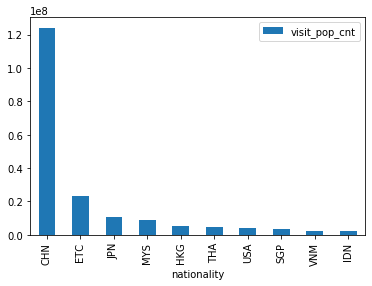

In [23]:
foreign_sum.plot(kind='bar')

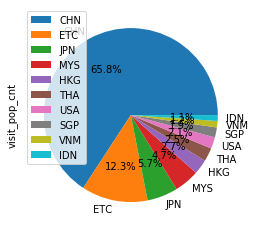

In [27]:
foreign_sum.plot(kind='pie',y='visit_pop_cnt',autopct='%.1f%%')

- 방문 외국인 국적은 중국, 일본, 말레이시아, 홍콩, 태국,미국,싱가폴,베트남,인도네시아, 기타가 있다
- 중국에서 오는 방문인구가 65%이상으로 압도적으로 많다.

## 나라별 읍면동 별 방문인구 합계

In [61]:
foreign_emd=foreign[['nationality','emd_nm','visit_pop_cnt']].groupby(['nationality','emd_nm']).sum()
foreign_emd

visit_pop_cnt
nationality emd_nm               
CHN         건입동           2390983
            구좌읍           1216653
            남원읍           3542203
            노형동           8881738
            대륜동           1166781
...                           ...
VNM         표선면             78650
            한경면             12555
            한림읍             61510
            화북동             13459
            효돈동              1655

[430 rows x 1 columns]

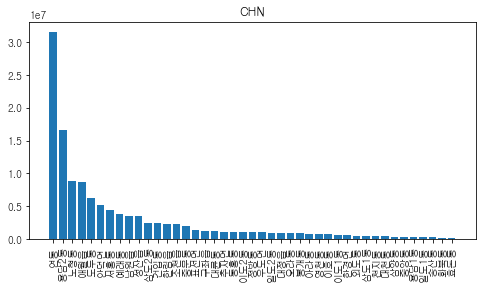

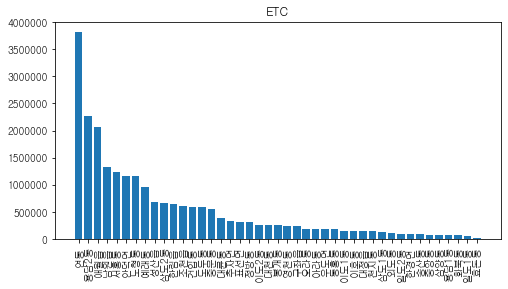

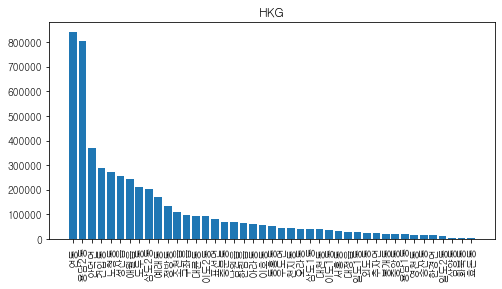

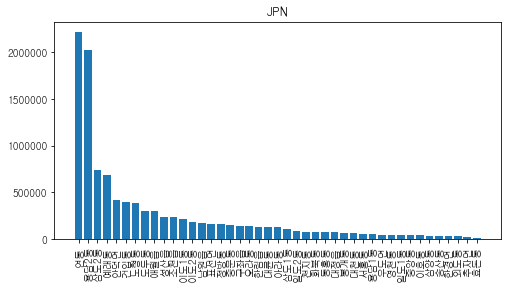

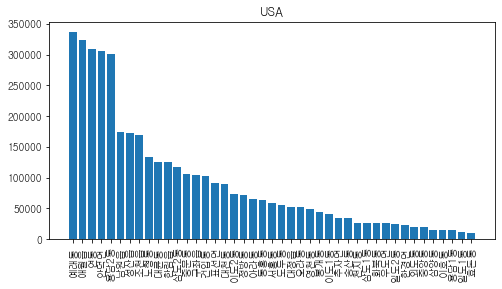

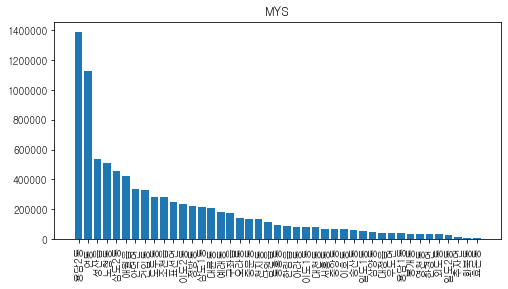

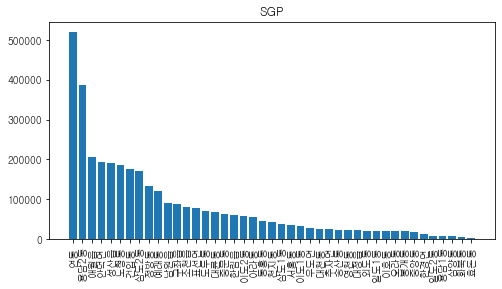

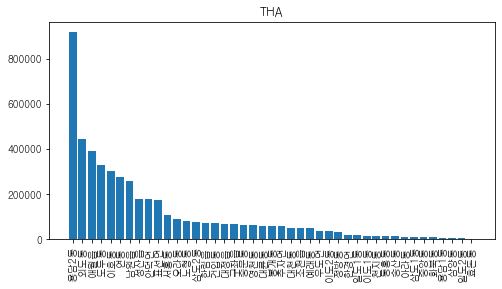

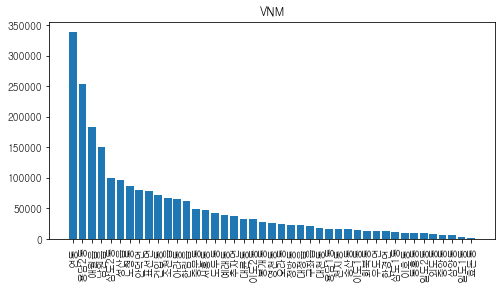

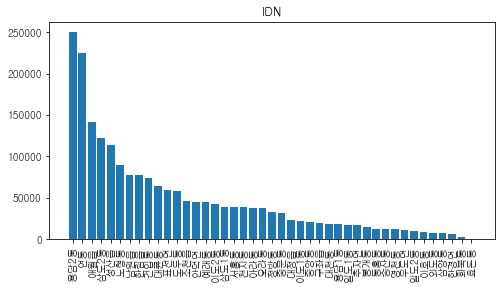

In [72]:
for nation in foreign['nationality'].unique():
    plt.figure(figsize=(8,4))
    foreign_emd_p=foreign_emd.loc[(nation,),]
    foreign_emd.sort_values(by='visit_pop_cnt',ascending=False,inplace=True)
    plt.bar(foreign_emd_p.index,foreign_emd_p['visit_pop_cnt'])
    plt.xticks(rotation=90)
    plt.title(nation)

- 중국 : 연동, 용담2동, 노형동, 애월읍,도두동
- 기타 : 연동, 용담2동 애월읍 남원읍,서홍동
- 홍콩 : 연동, 용담2동, 안덕면, 건입동,노형동
- 일본 : 연동, 용담2동, 삼동2동, 예래동, 안덕면
- 미국 : 예래동, 애월읍, 연동,안덕면, 용담2동
- 말레이시아 : 용담2동, 연동, 성산읍, 노형동, 삼도 2동
- 싱가폴 : 연동, 용담2동, 애월읍, 안덕면, 선산읍
- 태국 :  용담2동, 외도동, 애월읍, 도두동, 이호동
- 베트남 : 연동, 용담2동, 애월읍, 남원읍, 삼동2동

# 읍면동

## 읍면동별 방문인구 합계

In [31]:
foreign_emd=foreign[['emd_nm','visit_pop_cnt']].groupby(['emd_nm']).sum()
foreign_emd.sort_values(by='visit_pop_cnt',ascending=False,inplace=True)

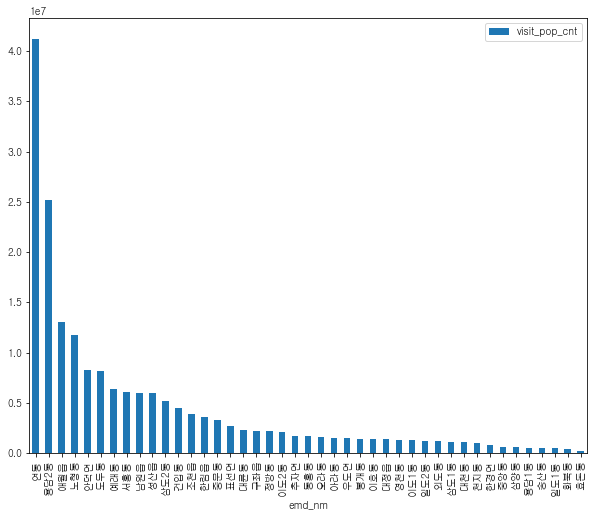

In [37]:
foreign_emd.plot(kind='bar',figsize=(10,8))

- 외국인 방문 인구가 가장 많은 읍면동은 연동, 용담2동,애월읍,노형동,안덕면으로 거주인구나 카드소비와는 조금 다른 양산이다. 
- 가장 적은 읍면동은 용담1동,송산동, 일도1동, 화북동,효돈동이다.

## 읍면동별 나라별 방문인구 합계

In [41]:
foreign_emd=foreign[['emd_nm','visit_pop_cnt','nationality']].groupby(['emd_nm','nationality']).sum()
foreign_emd

visit_pop_cnt
emd_nm nationality               
건입동    CHN                2390983
       ETC                 594842
       HKG                 287203
       IDN                  73745
       JPN                 400839
...                           ...
효돈동    MYS                   8256
       SGP                   3865
       THA                   1872
       USA                  10430
       VNM                   1655

[430 rows x 1 columns]

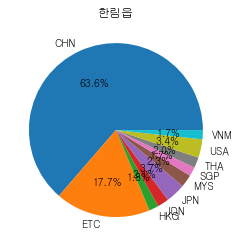

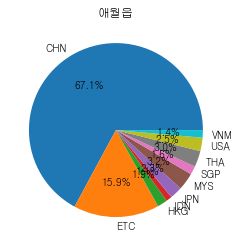

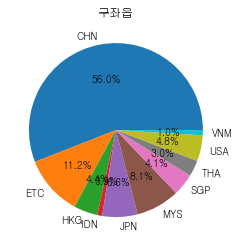

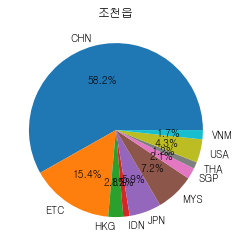

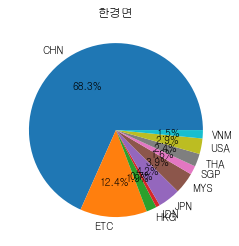

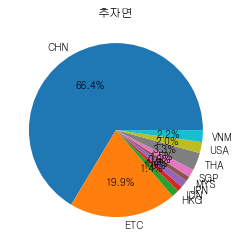

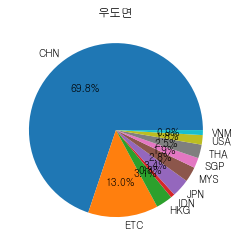

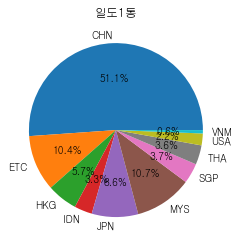

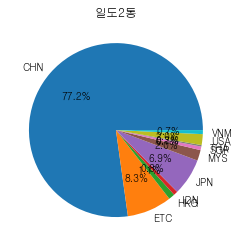

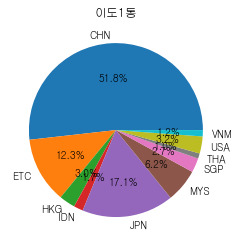

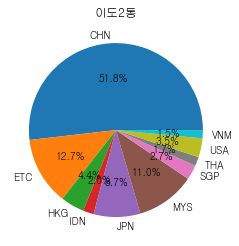

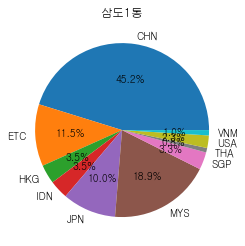

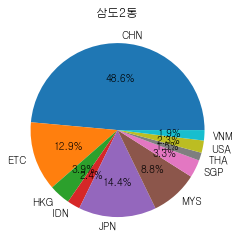

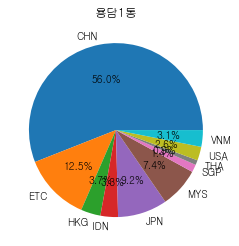

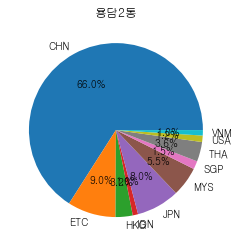

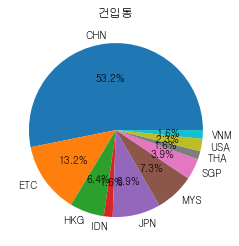

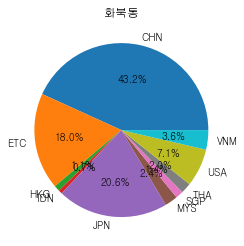

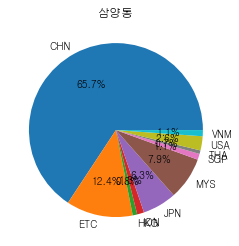

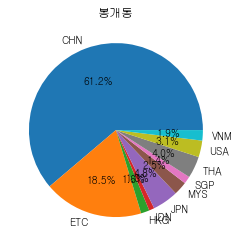

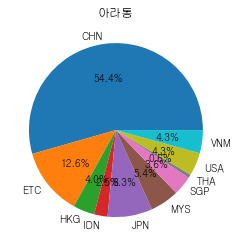

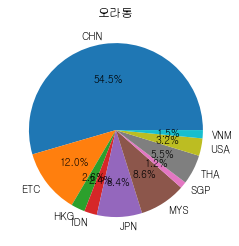

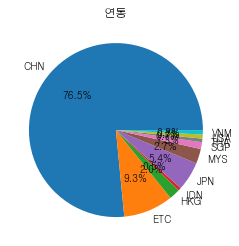

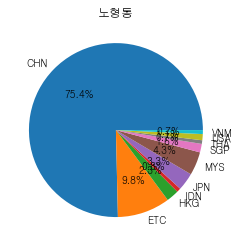

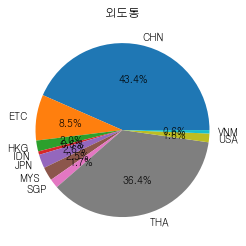

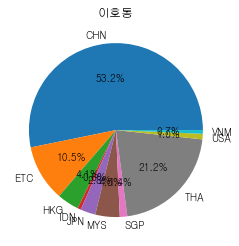

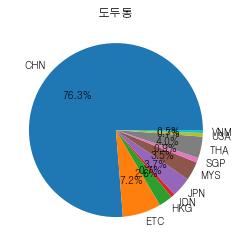

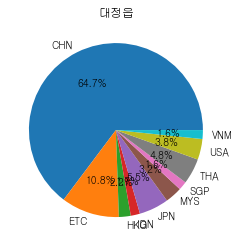

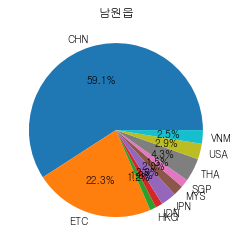

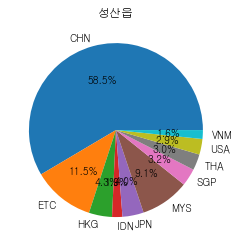

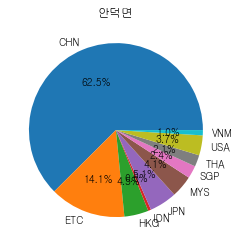

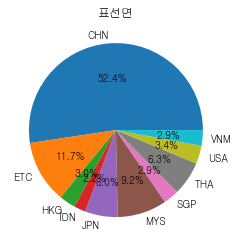

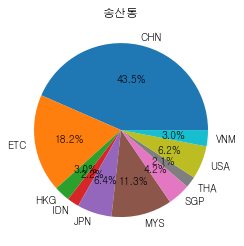

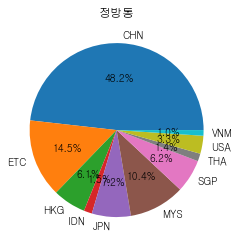

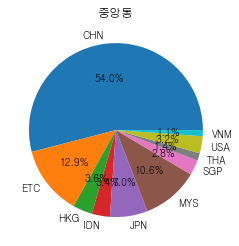

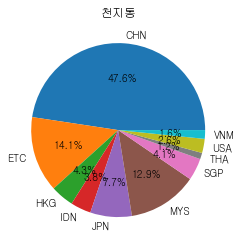

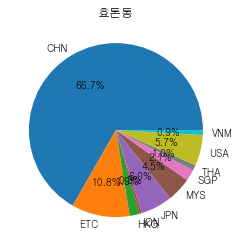

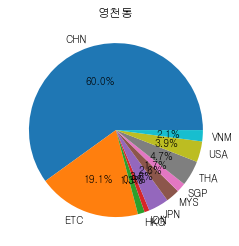

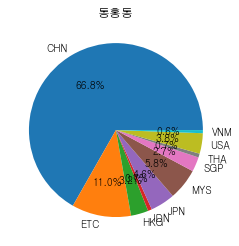

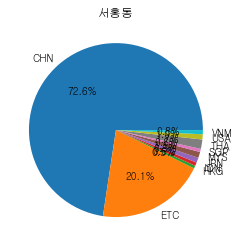

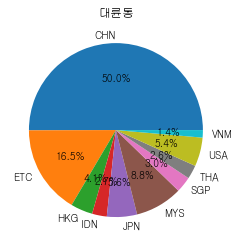

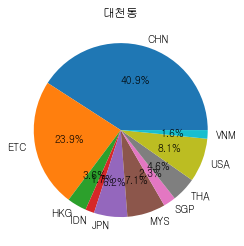

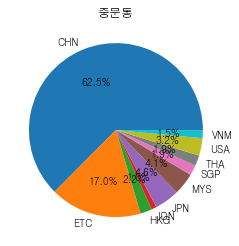

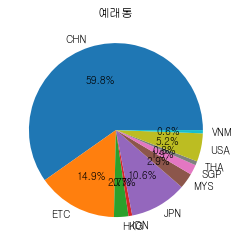

In [60]:
for name in foreign['emd_nm'].unique():
    plt.figure(figsize=(8,4))
    foreign_emd_p=foreign_emd.loc[(name,),]
    plt.pie(foreign_emd_p,labels=foreign_emd_p.index,autopct='%.1f%%')
    plt.title(name)

- 외국인 방문인구가 가장 높았던 애월읍,용담2동,연동,노형동,안덕면은 중국인 방문이 앞도적으로 높다
- 일도 1동(10%),이도 2동(11%),삼동 1동(18.9%),송산동(11%)천지동(12%)은 말레이시아가 전체비율보다 높다
- 이도 1동(17%),이동2동(9.7%),삼동 1동(10%),삼도 2동(14%),화북동 (20%)은 일본이 전체비율보다 높다
- 외도동(36%),이호동(21%) 태국이 전체비율보다 높다
- 대륜동(5%),대천동(8%)은 미국이 전체비율보다 높다

# 월별 추이

## 월별 방문인구 추이

In [75]:
foreign['month']=foreign['base_date'].apply(lambda x : x.split('-')[1])
foreign.head()

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt,month
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66,01
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21,01
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3,01
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5,01
4,2018-01-01,1,USA,제주시,50110250,한림읍,3,01


In [83]:
month=foreign[['month','visit_pop_cnt']].groupby(['month']).sum()
month

,visit_pop_cnt
month,
01,17913016
02,12832140
03,13637194
04,13967473
05,14342594
06,14888495
07,15907703
08,19138879
09,15461974


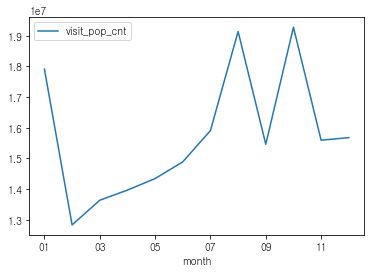

In [79]:
month.plot(kind='line')

- 가장 방문이 많은 달은 8월과 10월로 1920만명, 가장 방문이 적은 달은 2월로 1280만명 약 640만명 차이

## 월별 나라별 추이

In [88]:
month=foreign[['month','visit_pop_cnt','nationality']].groupby(['nationality','month']).sum()
month

visit_pop_cnt
nationality month               
CHN         01          12440157
            02           8663116
            03           8794063
            04           8258834
            05           8771280
...                          ...
VNM         08            193168
            09            137840
            10            211427
            11            186335
            12            133386

[120 rows x 1 columns]

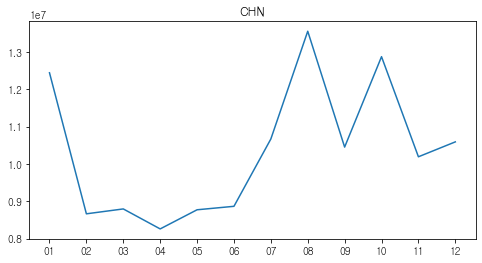

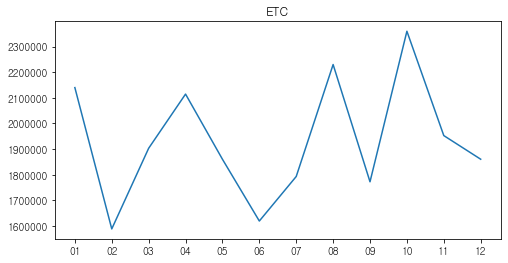

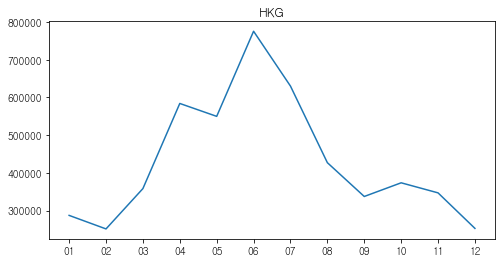

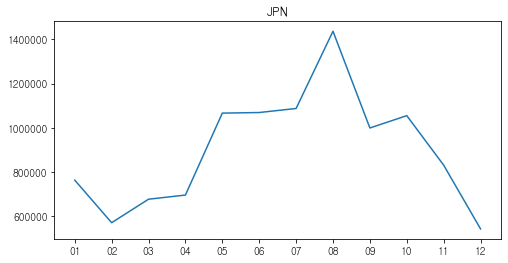

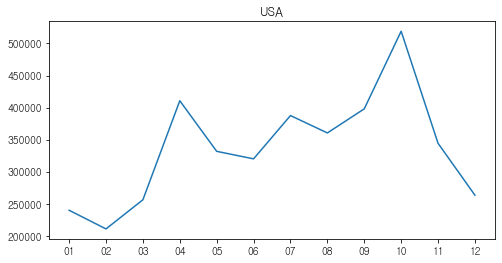

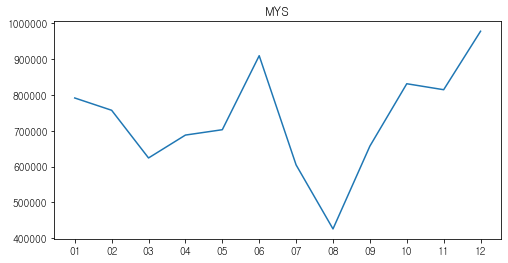

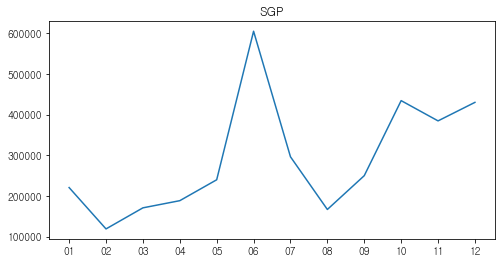

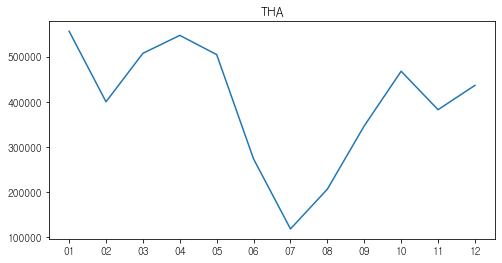

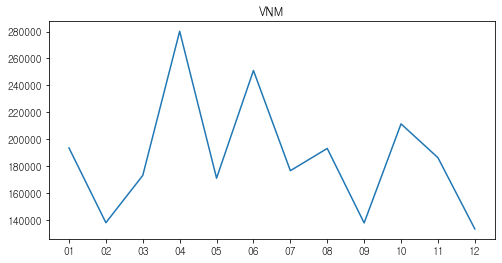

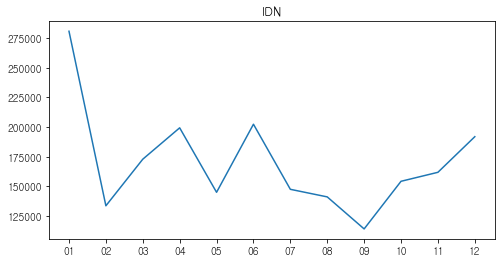

In [91]:
for nation in foreign['nationality'].unique():
    plt.figure(figsize=(8,4))
    nation_p=month.loc[(nation,),]
    plt.plot(nation_p.index,nation_p['visit_pop_cnt'])
    plt.title(nation)

- 중국은 전체 추이와 비슷
- 홍콩은 6월에 정점
- 일본은 8월에 정점
- 미국은 4월과 10월에 가장 많이 방문하고 8월에는 오히려 7월과 9월보다 낮음
- 말레이시아는 오히려 8월에 가장 적게 방문, 6월에 정점
- 싱가포르는 6월에 정점, 8월은 2월 다음 으로 낮다
- 태국은 7월에 가장 낮고, 4월,1월에 정점
- 베트남은 4월에 정점으로 9월에 가장 낮다
- 인도네시아는 9월에 가장 낮고 1월에 가장 높다

- 외국인 방문인구는 다른 지역의 거주 인구일 수도, 근무 인구 일수도있다
단순히 그 지역을 방문한 인구 중 국적이 외국인 사람이기에... 관광객이라고만 할 수는 없다
거주하는 외국인 분포와 비교가 필요하다